In [1]:
# !pip install download

In [2]:
from __future__ import print_function, absolute_import, division, unicode_literals

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import os
from download import download
import plotly.express as px

In [3]:
# fix the rc params to make plots pretty
mpl.rcParams.update({'font.size': 16, 'figure.figsize': (10, 6)})
# axes
mpl.rcParams['axes.grid'] = False

In [4]:
df = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv', encoding='ISO-8859-1')

In [5]:
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2  NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0  3.0  NaN  200.0  82.0  -2.3   
1   2  2013      3    1     1    7.0   7.0  3.0  NaN  200.0  80.0  -2.5   
2   3  2013      3    1     2    5.0   5.0  3.0  2.0  200.0  79.0  -3.0   
3   4  2013      3    1     3    6.0   6.0  3.0  NaN  200.0  79.0  -3.6   
4   5  2013      3    1     4    5.0   5.0  3.0  NaN  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station  
0  1020.8 -19.7   0.0    E   0.5  Dingling  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  1022.3 -19.4   0.0    N   2.1  Dingling

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [7]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [8]:
# combine the yer, month, day, hour columns into a single datetime column and drop the original columns set index to datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# df = df.set_index('datetime')
# df = df.drop(columns=['year', 'month', 'day', 'hour'])

In [9]:
datetime_col = df.pop('datetime')
df.insert(1, 'datetime', datetime_col)

In [10]:
df.head()

No            datetime  year  month  day  hour  PM2.5  PM10  SO2  NO2  \
0   1 2013-03-01 00:00:00  2013      3    1     0    4.0   4.0  3.0  NaN   
1   2 2013-03-01 01:00:00  2013      3    1     1    7.0   7.0  3.0  NaN   
2   3 2013-03-01 02:00:00  2013      3    1     2    5.0   5.0  3.0  2.0   
3   4 2013-03-01 03:00:00  2013      3    1     3    6.0   6.0  3.0  NaN   
4   5 2013-03-01 04:00:00  2013      3    1     4    5.0   5.0  3.0  NaN   

      CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM   station  
0  200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5  Dingling  
1  200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7  Dingling  
2  200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2  Dingling  
3  200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0  Dingling  
4  200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1  Dingling

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   datetime  35064 non-null  datetime64[ns]
 2   year      35064 non-null  int64         
 3   month     35064 non-null  int64         
 4   day       35064 non-null  int64         
 5   hour      35064 non-null  int64         
 6   PM2.5     34285 non-null  float64       
 7   PM10      34408 non-null  float64       
 8   SO2       34334 non-null  float64       
 9   NO2       33830 non-null  float64       
 10  CO        33052 non-null  float64       
 11  O3        33850 non-null  float64       
 12  TEMP      35011 non-null  float64       
 13  PRES      35014 non-null  float64       
 14  DEWP      35011 non-null  float64       
 15  RAIN      35013 non-null  float64       
 16  wd        34924 non-null  object        
 17  WSPM      35

In [12]:
# !pip install plotly==5.24.1

In [13]:

# set index to datetime
df = df.set_index('datetime')

In [14]:
df.describe()

No          year         month           day          hour  \
count  35064.000000  35064.000000  35064.000000  35064.000000  35064.000000   
mean   17532.500000   2014.662560      6.522930     15.729637     11.500000   
std    10122.249256      1.177213      3.448752      8.800218      6.922285   
min        1.000000   2013.000000      1.000000      1.000000      0.000000   
25%     8766.750000   2014.000000      4.000000      8.000000      5.750000   
50%    17532.500000   2015.000000      7.000000     16.000000     11.500000   
75%    26298.250000   2016.000000     10.000000     23.000000     17.250000   
max    35064.000000   2017.000000     12.000000     31.000000     23.000000   

              PM2.5          PM10           SO2           NO2            CO  \
count  34285.000000  34408.000000  34334.000000  33830.000000  33052.000000   
mean      65.989497     83.739723     11.749650     27.585467    904.896073   
std       72.267723     79.541685     15.519259     26.383882    903.306220   
min        3.000000      2.000000      0.285600      1.026500    100.000000   
25%       14.000000     26.000000      2.000000      9.000000    300.000000   
50%       41.000000     60.000000      5.000000     19.000000    600.000000   
75%       93.000000    117.000000     15.000000     38.000000   1200.000000   
max      881.000000    905.000000    156.000000    205.000000  10000.000000   

                 O3          TEMP          PRES          DEWP          RAIN  \
count  33850.000000  35011.000000  35014.000000  35011.000000  35013.000000   
mean      68.548371     13.686111   1007.760278      1.505495      0.060366   
std       53.764424     11.365313     10.225664     13.822099      0.752899   
min        0.214200    -16.600000    982.400000    -35.100000      0.000000   
25%       31.000000      3.400000    999.300000    -10.200000      0.000000   
50%       61.000000     14.700000   1007.400000      1.800000      0.000000   
75%       90.000000     23.300000   1016.000000     14.200000      0.000000   
max      500.000000     41.400000   1036.500000     27.200000     52.100000   

               WSPM  
count  35021.000000  
mean       1.853836  
std        1.309808  
min        0.000000  
25%        1.000000  
50%        1.500000  
75%        2.300000  
max       10.000000

In [15]:
df.loc['2013':'2014']

No  year  month  day  hour  PM2.5  PM10  SO2  NO2  \
datetime                                                                    
2013-03-01 00:00:00      1  2013      3    1     0    4.0   4.0  3.0  NaN   
2013-03-01 01:00:00      2  2013      3    1     1    7.0   7.0  3.0  NaN   
2013-03-01 02:00:00      3  2013      3    1     2    5.0   5.0  3.0  2.0   
2013-03-01 03:00:00      4  2013      3    1     3    6.0   6.0  3.0  NaN   
2013-03-01 04:00:00      5  2013      3    1     4    5.0   5.0  3.0  NaN   
...                    ...   ...    ...  ...   ...    ...   ...  ...  ...   
2014-12-31 19:00:00  16100  2014     12   31    19    7.0  37.0  2.0  2.0   
2014-12-31 20:00:00  16101  2014     12   31    20    NaN   NaN  NaN  NaN   
2014-12-31 21:00:00  16102  2014     12   31    21    NaN   NaN  NaN  NaN   
2014-12-31 22:00:00  16103  2014     12   31    22    NaN   NaN  NaN  NaN   
2014-12-31 23:00:00  16104  2014     12   31    23    NaN   NaN  NaN  NaN   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
datetime                                                                
2013-03-01 00:00:00  200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00  200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00  200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00  200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00  200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   
...                    ...   ...   ...     ...   ...   ...  ...   ...   
2014-12-31 19:00:00  300.0  69.0  -2.3  1015.0 -24.8   0.0   NW   2.2   
2014-12-31 20:00:00    NaN   NaN  -2.5  1014.0 -24.3   0.0  NNW   2.3   
2014-12-31 21:00:00    NaN   NaN  -3.1  1012.0 -23.5   0.0   NW   1.4   
2014-12-31 22:00:00    NaN   NaN  -3.0  1014.0 -23.4   0.0   NW   2.7   
2014-12-31 23:00:00    NaN   NaN  -3.5  1012.0 -22.7   0.0    E   1.4   

                      station  
datetime                       
2013-03-01 00:00:00  Dingling  
2013-03-01 01:00:00  Dingling  
2013-03-01 02:00:00  Dingling  
2013-03-01 03:00:00  Dingling  
2013-03-01 04:00:00  Dingling  
...                       ...  
2014-12-31 19:00:00  Dingling  
2014-12-31 20:00:00  Dingling  
2014-12-31 21:00:00  Dingling  
2014-12-31 22:00:00  Dingling  
2014-12-31 23:00:00  Dingling  

[16104 rows x 18 columns]

In [16]:
pm_2_5 = df['PM2.5']
pm_2_5.head()

datetime
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    7.0
2013-03-01 02:00:00    5.0
2013-03-01 03:00:00    6.0
2013-03-01 04:00:00    5.0
Name: PM2.5, dtype: float64

<Axes: xlabel='datetime'>

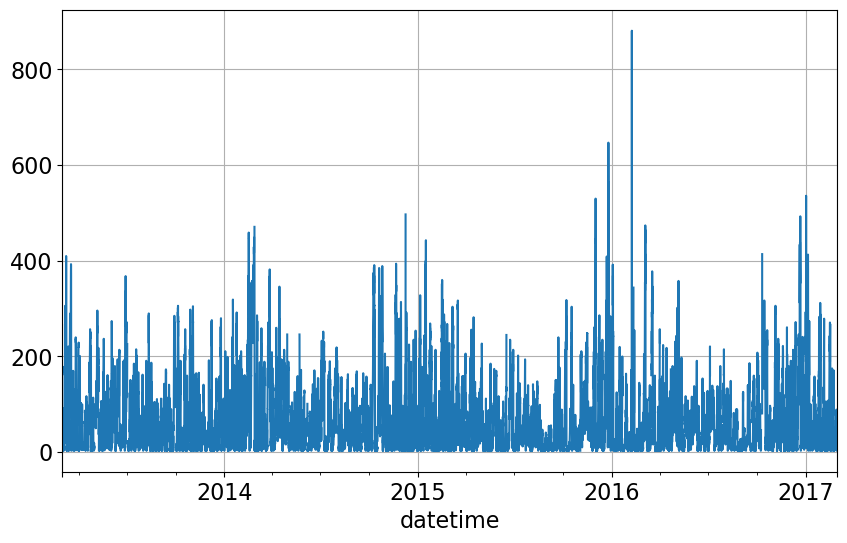

In [17]:
pm_2_5.plot(grid=True)

<Axes: xlabel='datetime'>

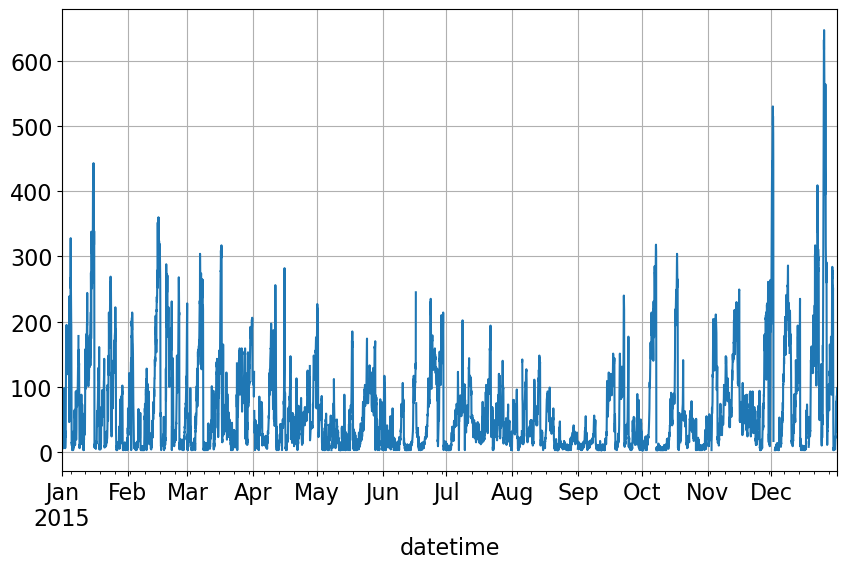

In [18]:
pm_2015 = df.loc['2015']
pm_2015 = pm_2015['PM2.5']
pm_2015.plot(grid=True)

<Axes: xlabel='datetime'>

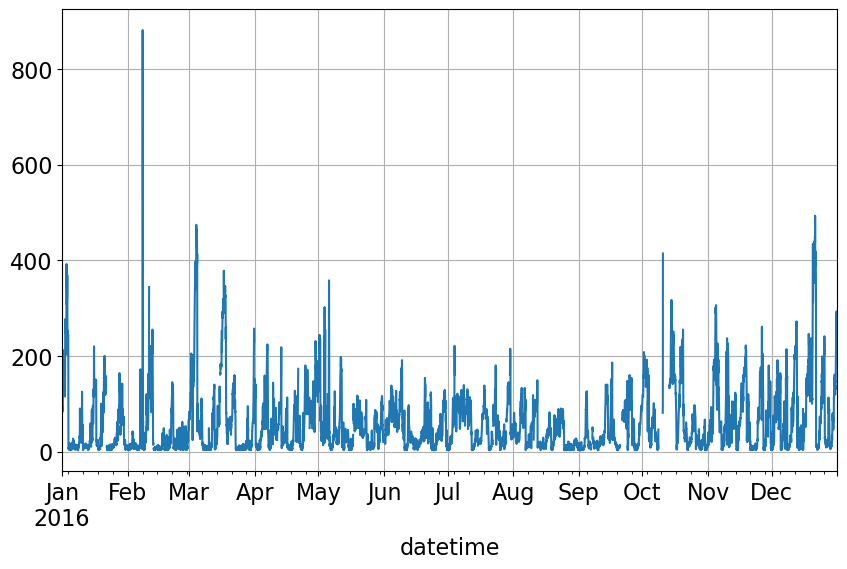

In [19]:
pm_2016 = df.loc['2016']
pm_2016 = pm_2016['PM2.5']
pm_2016.plot(grid=True)

In [20]:
fig = px.line(df, x=df.index, y='PM2.5', title='PM2.5 over time')
# change the fig size
fig.update_layout(width=1400, height=800)
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [21]:
fig = px.line(df, x=df.index, y='PM2.5', title='PM2.5 over time')
# change the fig size
fig.update_layout(width=1400, height=800)
# putting the buttons
fig.update_xaxes(rangeslider_visible=True,
                 rangeselector=dict(
                     buttons=list([
                         dict(count=1, label="1y", step="year", stepmode="backward"),
                         dict(count=2, label="2y", step="year", stepmode="backward"),
                         dict(count=3, label="3y", step="year", stepmode="backward"),
                        #  dict(count=4, label="4y", step="year", stepmode="backward"),
                        #  dict(count=5, label="5y", step="year", stepmode="backward"),
                         dict(step="all")
                     ])
                 )
                 )
fig.show()

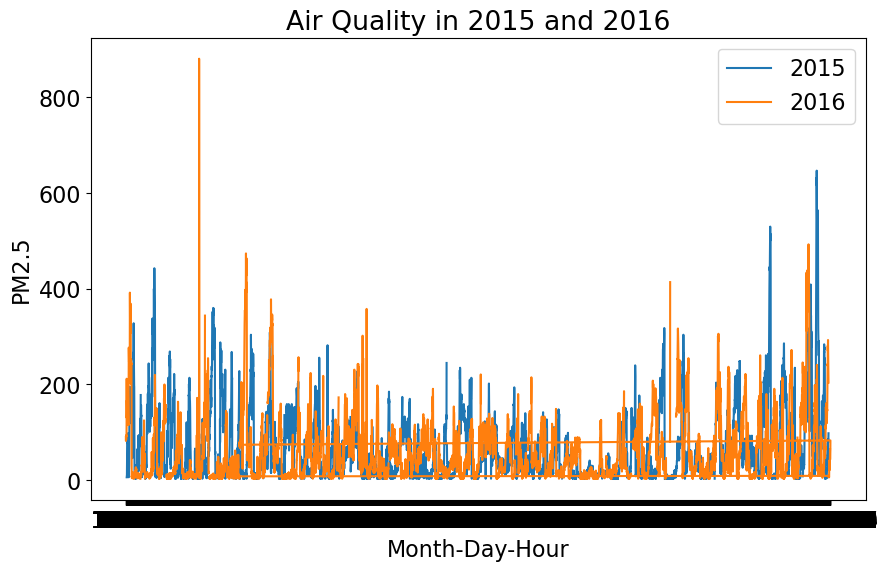

In [22]:
# overlaying two plots for 2015 and 2016 
df_2015 = df.loc['2015'].reset_index()
df_2016 = df.loc['2016'].reset_index()

df_2015['month_day_hour'] = df_2015.apply(lambda x: f'{x.month}-{x.day}-{x.hour}', axis=1)
df_2016['month_day_hour'] = df_2016.apply(lambda x: f'{x.month}-{x.day}-{x.hour}', axis=1)

plt.plot(df_2015['month_day_hour'], df_2015['PM2.5'], label='2015')
plt.plot(df_2016['month_day_hour'], df_2016['PM2.5'], label='2016')
plt.legend()
plt.xlabel('Month-Day-Hour')
plt.ylabel('PM2.5')
plt.title("Air Quality in 2015 and 2016")
plt.show()



In [23]:
df['2015':'2016'][["month", "PM2.5"]].groupby('month').describe()


PM2.5                                                        
        count        mean         std  min   25%   50%     75%    max
month                                                                
1      1452.0   69.808471   80.164962  3.0  11.0  31.0  115.00  443.0
2      1358.0   57.877761   78.840322  3.0   9.0  20.0   75.75  881.0
3      1469.0   78.574404   88.377384  3.0  12.0  49.0  114.00  474.0
4      1411.0   58.346421   47.868178  3.0  21.5  46.0   84.00  282.0
5      1454.0   48.284044   47.379025  3.0  15.0  34.0   67.00  358.0
6      1435.0   49.877213   47.543761  3.0  12.0  32.0   77.00  245.0
7      1477.0   53.255924   39.469254  3.0  22.0  44.0   78.00  221.0
8      1471.0   36.114208   31.163218  3.0  12.0  25.0   52.00  149.0
9      1372.0   40.823615   42.892359  3.0  10.0  21.0   63.00  240.0
10     1350.0   63.905926   74.107874  3.0  11.0  32.0   85.00  414.0
11     1424.0   80.517556   64.336789  3.0  31.0  60.0  118.00  306.0
12     1456.0  108.480769  114.896551  3.0  18.0  69.0  157.25  647.0

In [24]:
# Selecting the particular features and group by them using month and aggregate the values
df['2015':"2016"][["month", "PM2.5",'TEMP']].groupby('month').agg({'PM2.5':['max'], 'TEMP':['min', 'max']})

PM2.5  TEMP      
         max   min   max
month                   
1      443.0 -16.6  12.0
2      881.0 -10.0  14.0
3      474.0  -6.4  23.7
4      282.0   1.3  32.0
5      358.0   7.0  33.8
6      245.0  16.0  38.1
7      221.0  16.8  39.2
8      149.0  17.1  36.3
9      240.0   7.8  32.0
10     414.0  -1.4  28.1
11     306.0 -10.3  20.8
12     647.0  -9.7  11.0

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>], dtype=object)

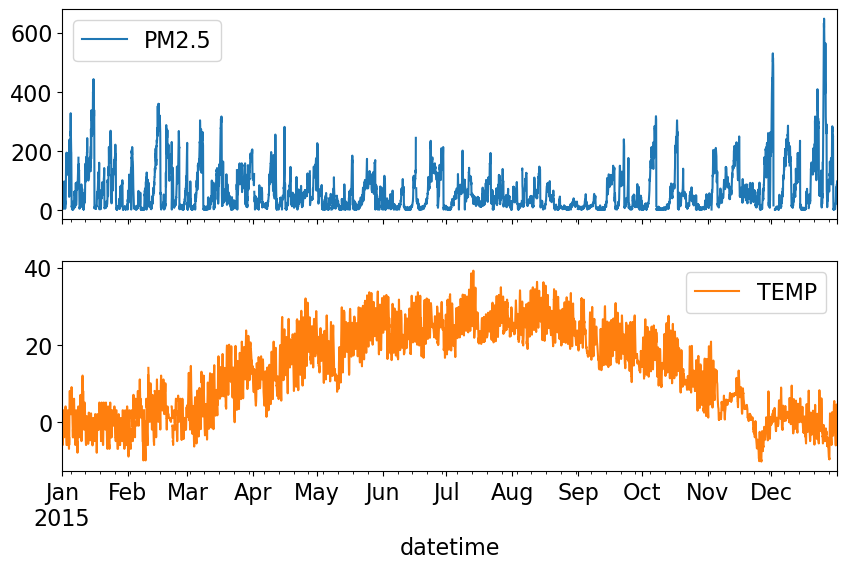

In [27]:
# plot the PM2.5 and TEMP for 2015 
df_2015= df.loc['2015']
pm_2_5_temp = df_2015[['PM2.5', 'TEMP']]
pm_2_5_temp.plot(subplots=True)

array([[<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'TEMP'}>]], dtype=object)

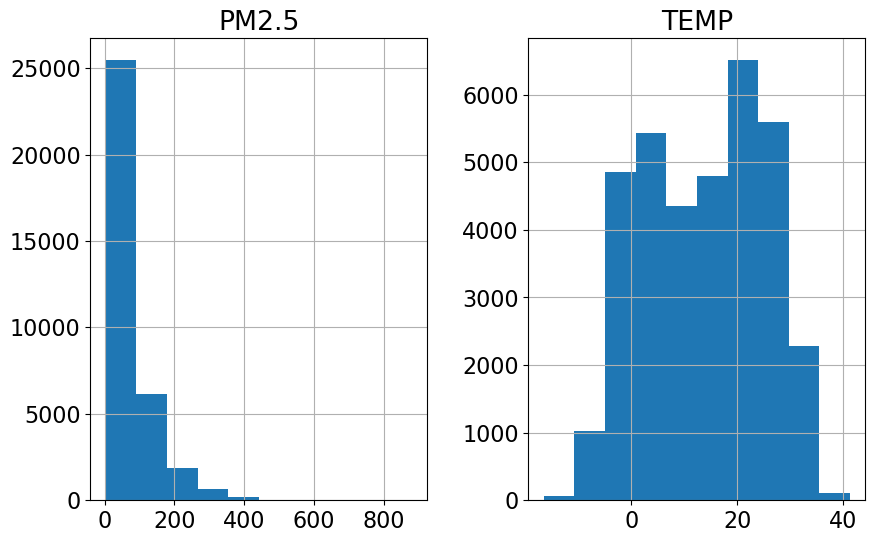

In [28]:
df[['PM2.5', 'TEMP']].hist()
# in thempreature we see the bimodal distribution

<Axes: ylabel='Density'>

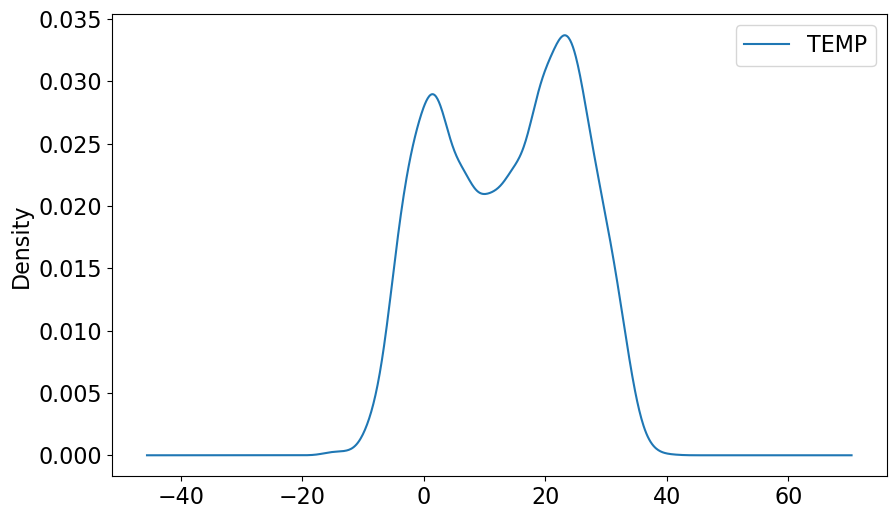

In [29]:
df[['TEMP']].plot(kind='density')
# kenal density estimation

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

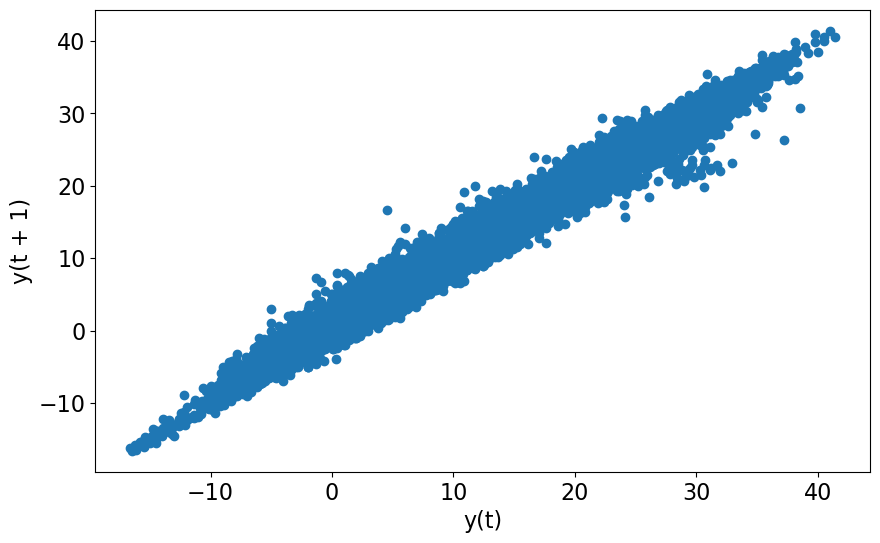

In [33]:
# lag plot is a special type of scatter plot with lagging values of the variable x-axis is the current value and y-axis is the lagged value
pd.plotting.lag_plot(df['TEMP'], lag=1)
# lag= 1 = first order lag plot used for checking multiple things like coorelation, randomness, linearity, outlies, serial correlation, auto correclation, etc.

<Axes: xlabel='y(t)', ylabel='y(t + 12)'>

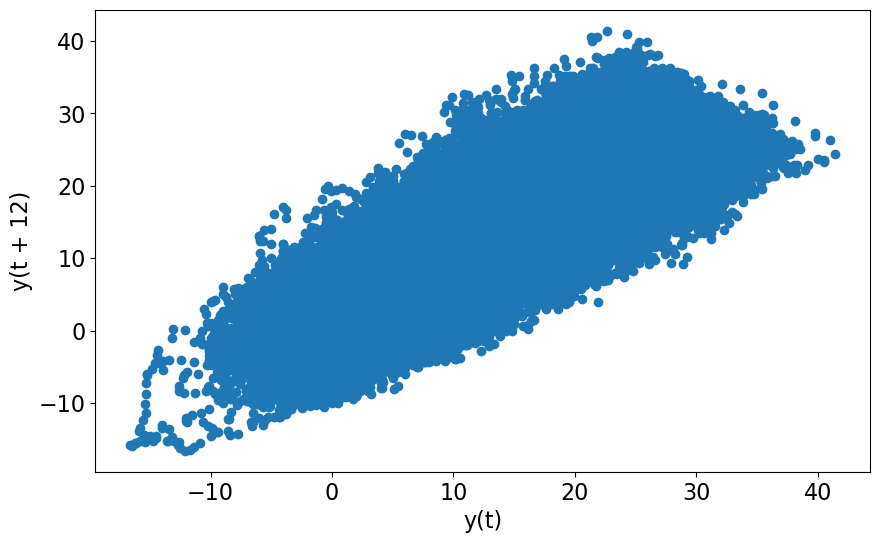

In [35]:
pd.plotting.lag_plot(df['TEMP'], lag=12)
# Lag plots helps us to understand smoothing function, seasonality, trend, etc.

<Axes: xlabel='y(t)', ylabel='y(t + 24)'>

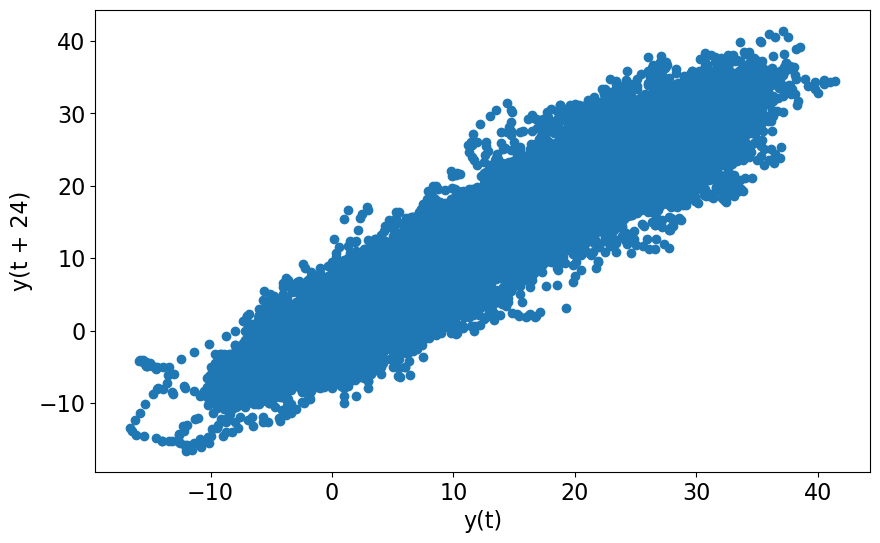

In [36]:
pd.plotting.lag_plot(df['TEMP'], lag=24)
# lag is nothing it's just called as a auto correlation

<Axes: xlabel='y(t)', ylabel='y(t + 8640)'>

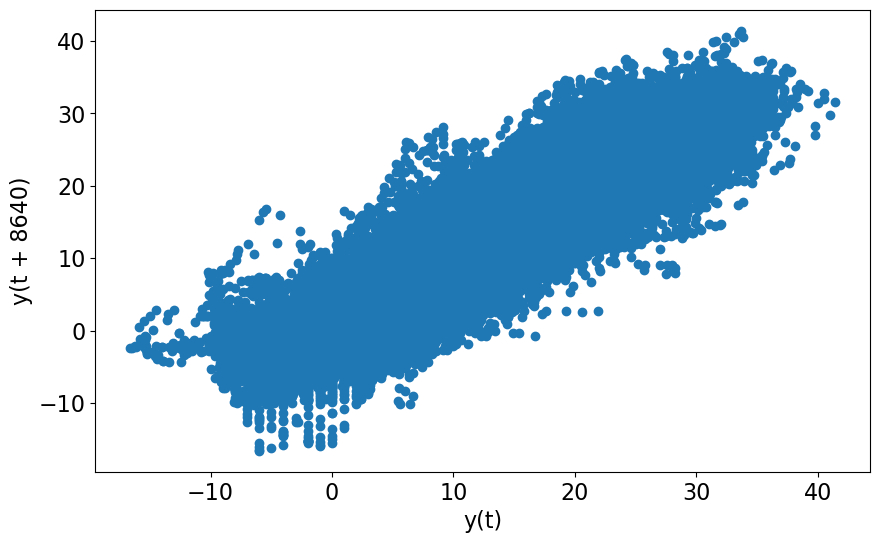

In [37]:
pd.plotting.lag_plot(df['TEMP'], lag=8640) # for an year
# positive trend

<Axes: xlabel='y(t)', ylabel='y(t + 4320)'>

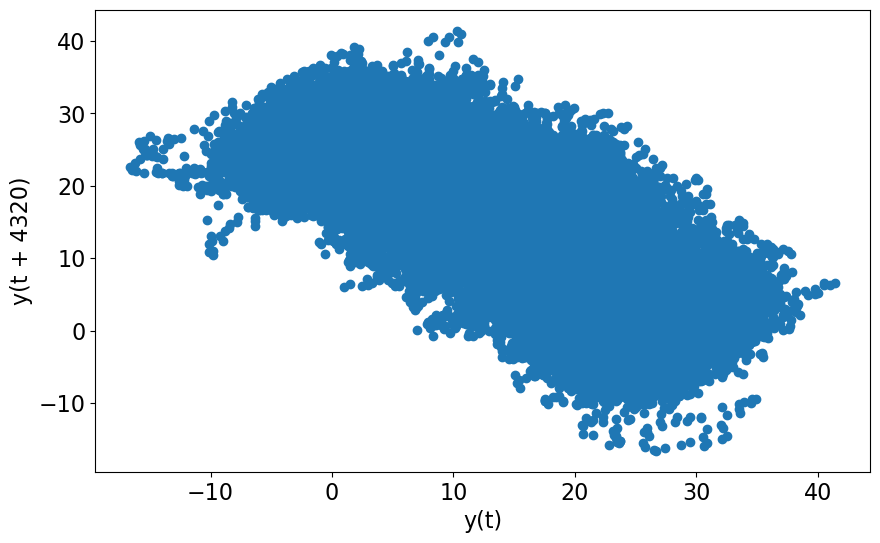

In [38]:
pd.plotting.lag_plot(df['TEMP'], lag=4320) #6 months shows negative correlation

<Axes: xlabel='y(t)', ylabel='y(t + 2150)'>

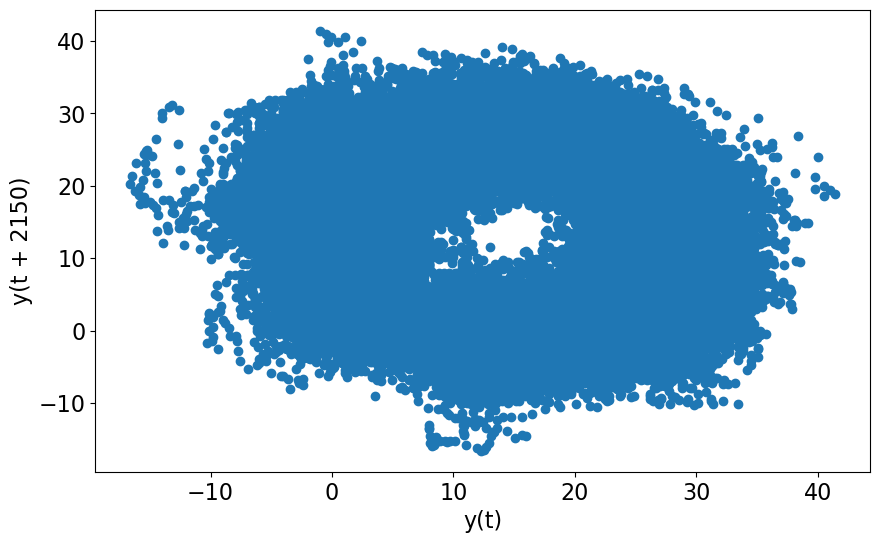

In [ ]:
# for 3 months we cann't see any correlation
pd.plotting.lag_plot(df['TEMP'], lag=2150) 

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

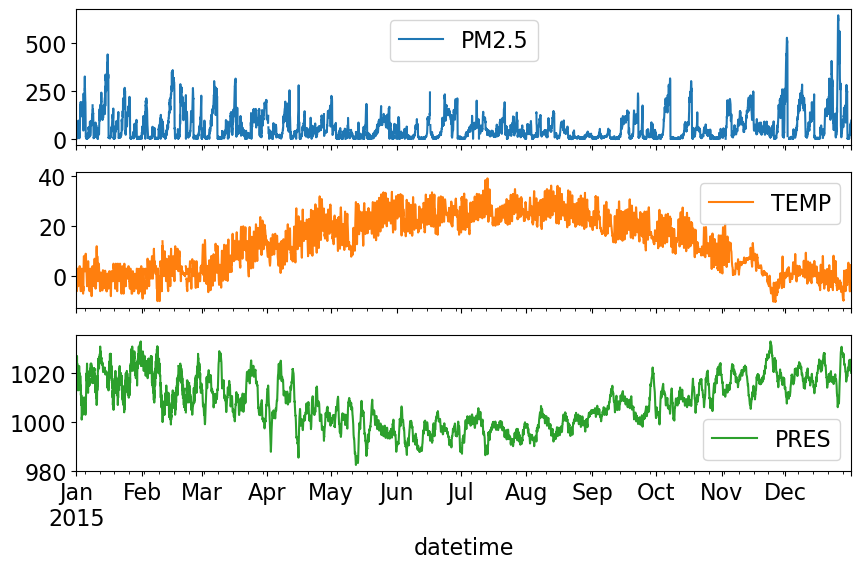

In [41]:
# plotting the plots for multiple features
df_2015 = df.loc['2015']
df_2015 = df_2015[['PM2.5', 'TEMP', 'PRES']]
df_2015.plot(subplots=True)

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

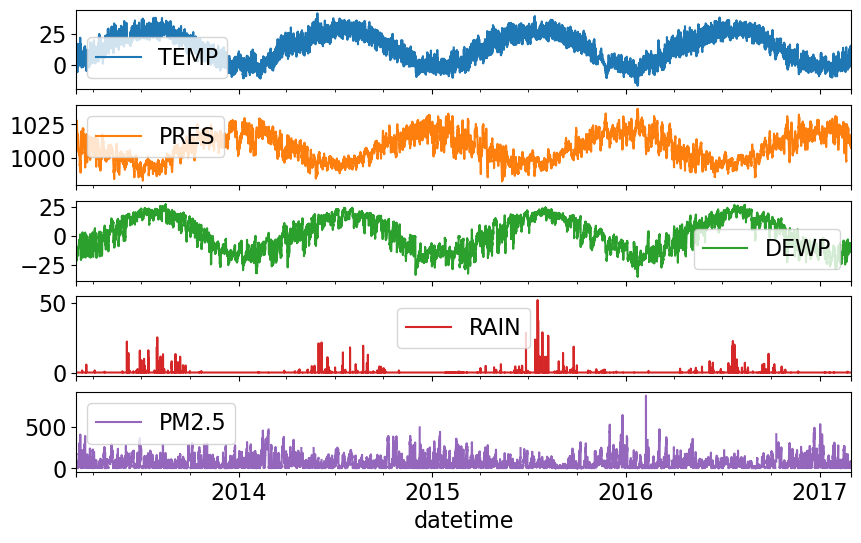

In [44]:
# multi data
mul_data = df[[ 'TEMP', 'PRES', 'DEWP','RAIN','PM2.5',]]
mul_data.plot(subplots=True)

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

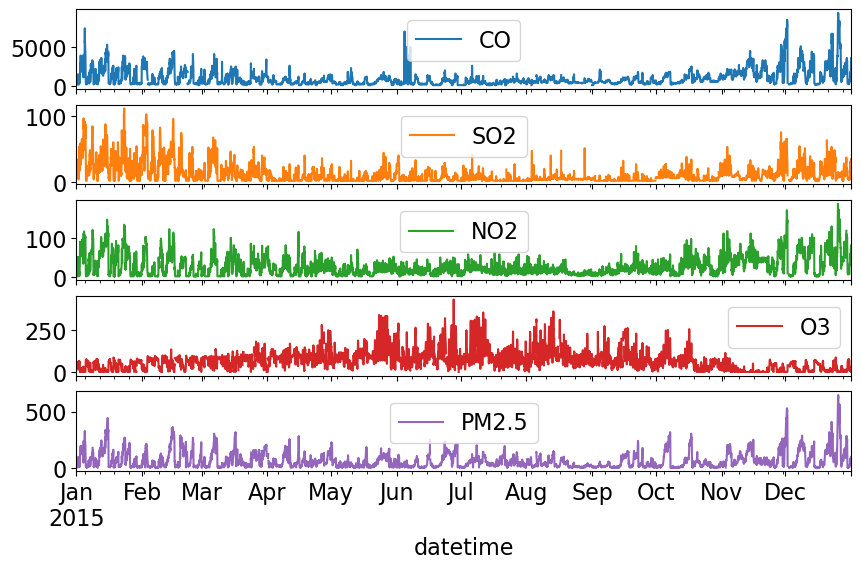

In [45]:
# plotting CO, SO2, NO2, O3, PM2.5
df_2015 = df.loc['2015']
df_2015 = df_2015[['CO', 'SO2', 'NO2', 'O3', 'PM2.5']]
df_2015.plot(subplots=True)

In [46]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [47]:
df.isnull().any()

No         False
year       False
month      False
day        False
hour       False
PM2.5       True
PM10        True
SO2         True
NO2         True
CO          True
O3          True
TEMP        True
PRES        True
DEWP        True
RAIN        True
wd          True
WSPM        True
station    False
dtype: bool

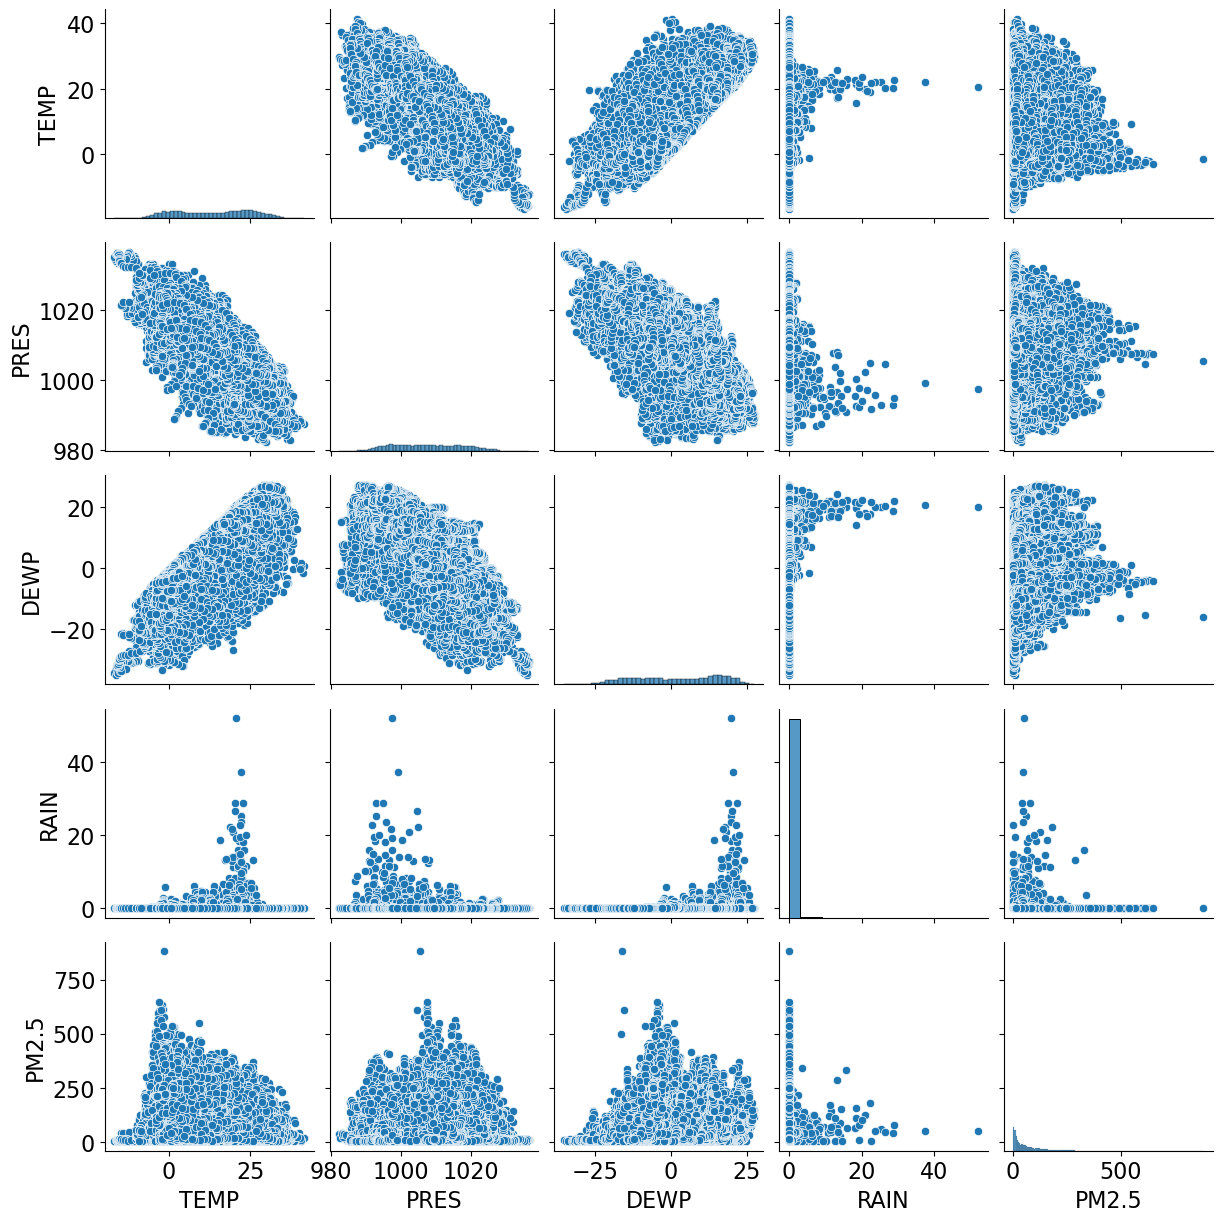

In [48]:
# pair plot for seeing the correlation between the two features
sns.pairplot(df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']])

In [52]:
# pearson correlation
df[['SO2','NO2', "O3", "CO", 'PM2.5']].corr(method='pearson')

SO2       NO2        O3        CO     PM2.5
SO2    1.000000  0.610433 -0.182096  0.529182  0.475117
NO2    0.610433  1.000000 -0.373625  0.798753  0.718170
O3    -0.182096 -0.373625  1.000000 -0.303275 -0.100542
CO     0.529182  0.798753 -0.303275  1.000000  0.802737
PM2.5  0.475117  0.718170 -0.100542  0.802737  1.000000

<Axes: >

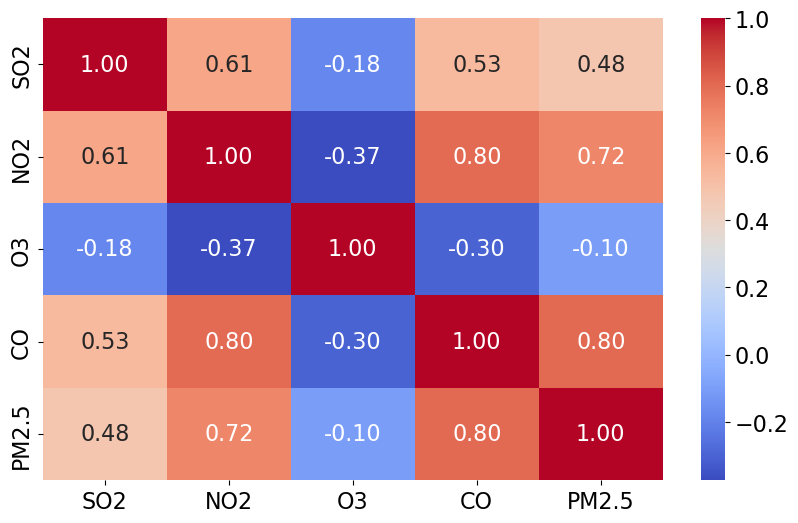

In [54]:
# HeatMap for the correlation
sns.heatmap(df[['SO2','NO2', "O3", "CO", 'PM2.5']].corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [55]:
# Drop the missing values (But it's not a good practice)
df_copy = df.copy()
df_copy.dropna(inplace=True)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

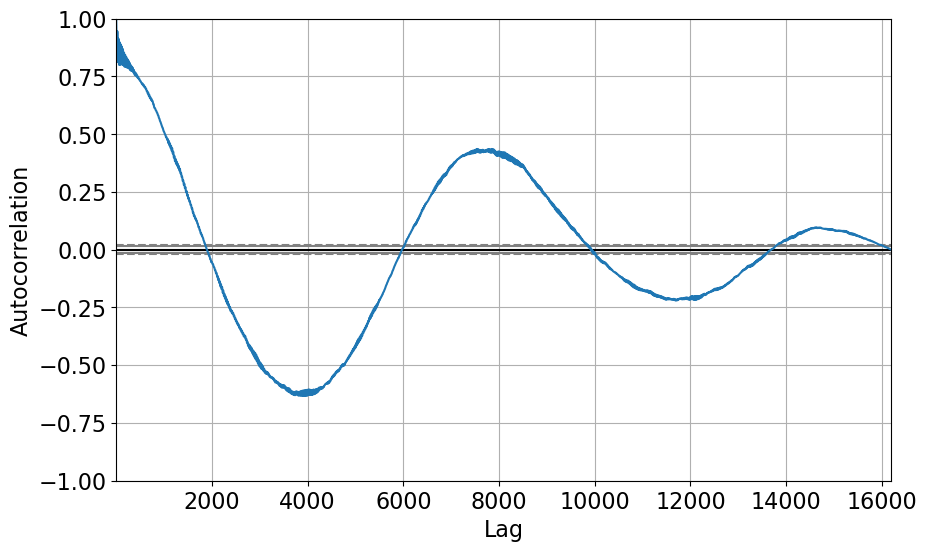

In [56]:
pd.plotting.autocorrelation_plot(df_copy['2015':'2016']['TEMP'])
# So many lags can we visualizing is difficult

In [60]:
# Doing the same for months wise for better visulaization 
df_copy["TEMP"].resample('ME').mean()

datetime
2013-03-31     6.039970
2013-04-30    12.208494
2013-05-31    21.886386
2013-06-30    23.752827
2013-07-31    27.405079
2013-08-31    27.228465
2013-09-30    20.482500
2013-10-31          NaN
2013-11-30     5.434524
2013-12-31     0.896623
2014-01-31     0.023428
2014-02-28    -0.352762
2014-03-31    10.415449
2014-04-30    17.235362
2014-05-31    22.043236
2014-06-30    25.194985
2014-07-31    28.409502
2014-08-31    26.284552
2014-09-30    20.834161
2014-10-31    13.556000
2014-11-30     6.357762
2014-12-31    -0.745582
2015-01-31    -0.590377
2015-02-28     1.572512
2015-03-31     8.707613
2015-04-30    15.566570
2015-05-31    21.300275
2015-06-30    24.636691
2015-07-31    26.228630
2015-08-31    26.135854
2015-09-30    20.392206
2015-10-31    14.387465
2015-11-30     3.358686
2015-12-31    -0.053912
2016-01-31    -4.233428
2016-02-29     1.434441
2016-03-31     8.687006
2016-04-30    16.262014
2016-05-31    20.793142
2016-06-30    25.481977
2016-07-31    25.839216
2016-08

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

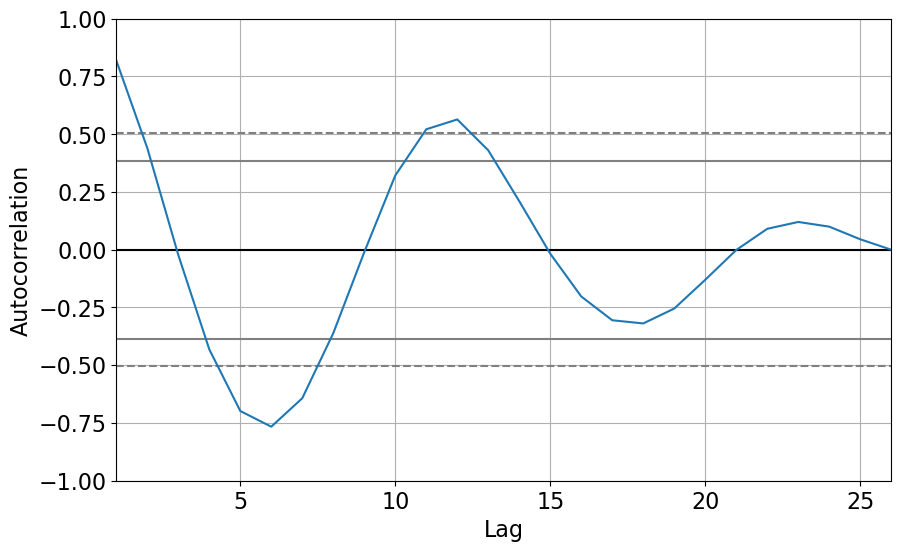

In [ ]:
# plotting the autocorrelation for the months
pd.plotting.autocorrelation_plot(df_copy["2015":"2017"]['TEMP'].resample('ME').mean())
# Lines are the confidence interval for the correlation values ; Strong lines are 90% confidence interval and the light lines are 95% confidence interval

2
